Forma do dataset: (208, 61)
Conjunto de treino: (166, 60), Conjunto de teste: (42, 60)
Distribuição das classes: R=97, M=111

PCA: 29 componentes explicam 95.14% da variância


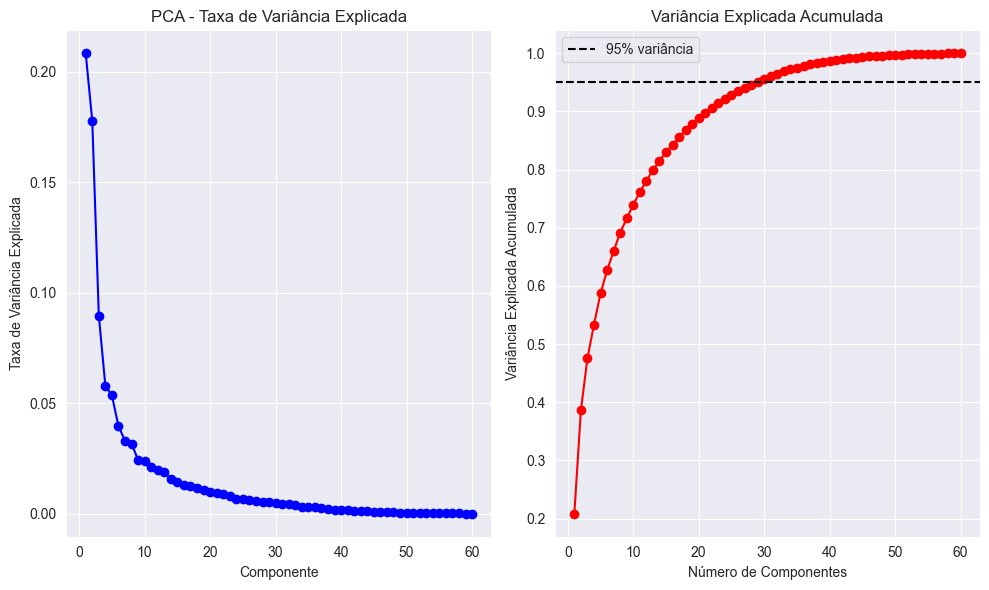


Árvore de Decisão (Original): Acurácia treino = 1.000
Árvore de Decisão (Original): Acurácia teste = 0.833
Árvore de Decisão (PCA): Acurácia treino = 1.000
Árvore de Decisão (PCA): Acurácia teste = 0.857

Validação cruzada (Original): 0.723 (+/- 0.092)
Validação cruzada (PCA): 0.730 (+/- 0.148)

Melhores parâmetros (Original): {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Melhor score CV (Original): 0.753
Melhores parâmetros (PCA): {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 2}
Melhor score CV (PCA): 0.813

Árvore podada (profundidade=3): Acurácia teste = 0.833

Árvore podada (profundidade=5): Acurácia teste = 0.810

Árvore podada (profundidade=7): Acurácia teste = 0.810


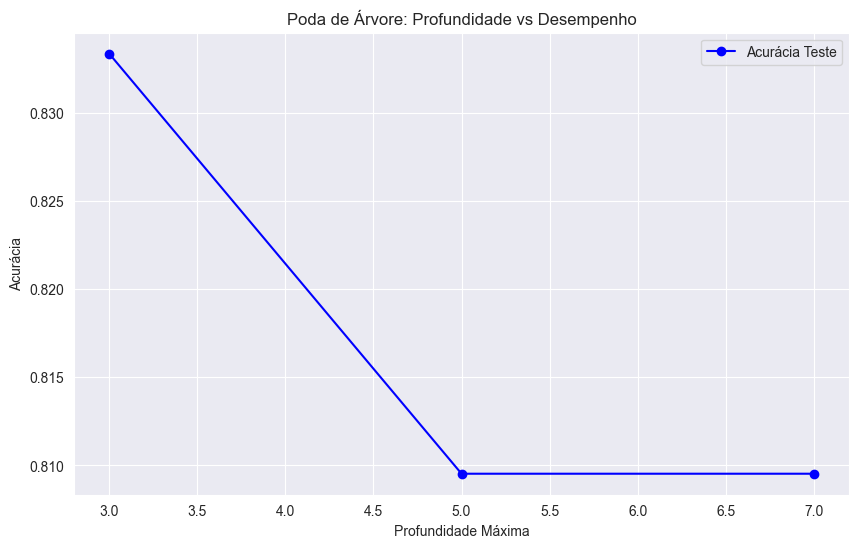

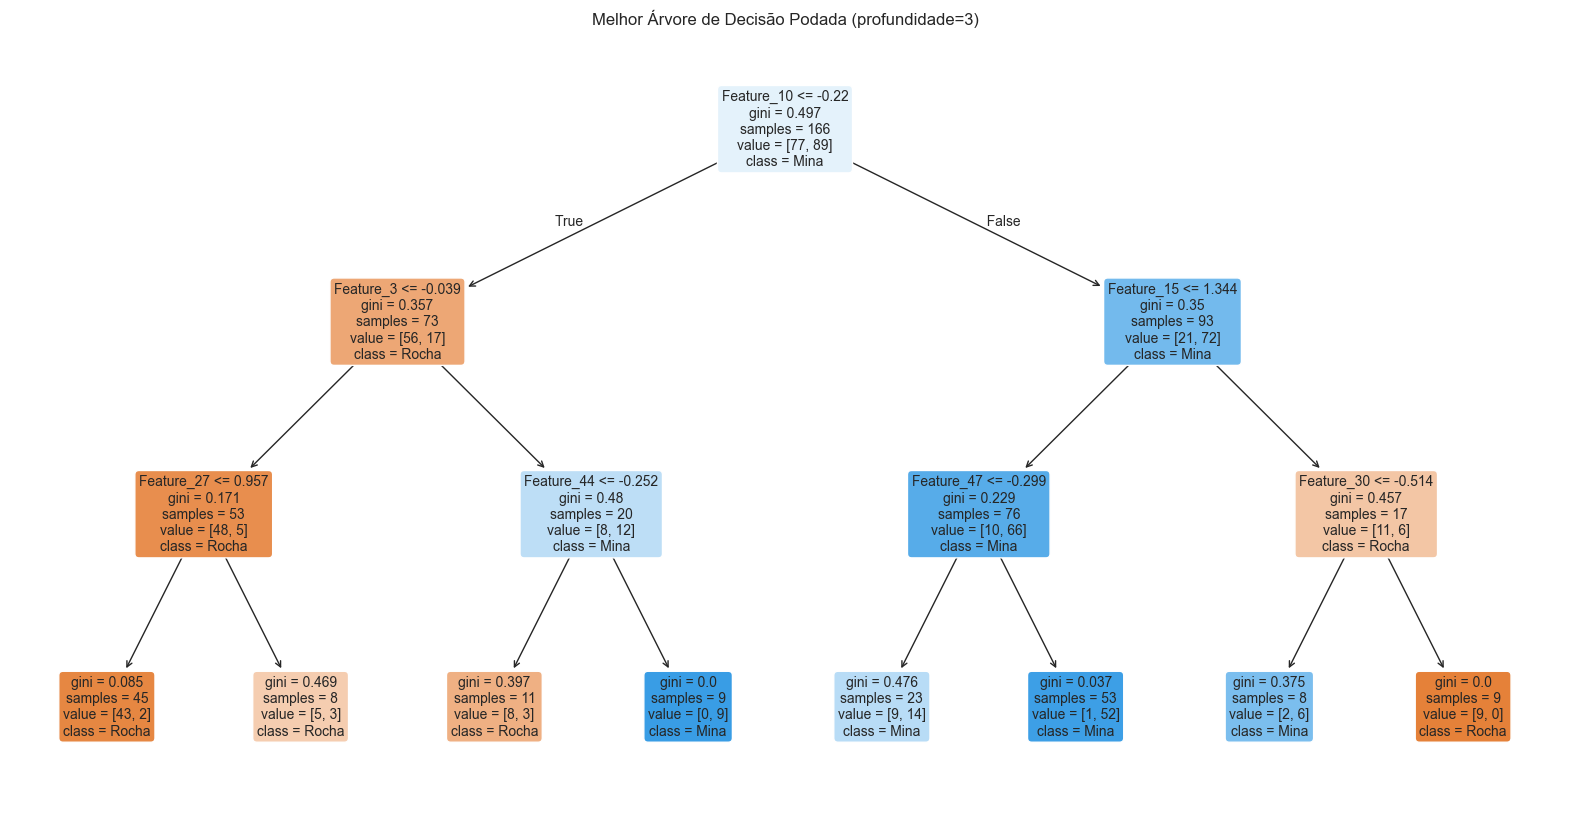


=== Métricas de Classificação Binária ===
Acurácia: 0.810
Precisão: 0.850
Recall (Sensibilidade): 0.773
F1-Score: 0.810
Especificidade: 0.850


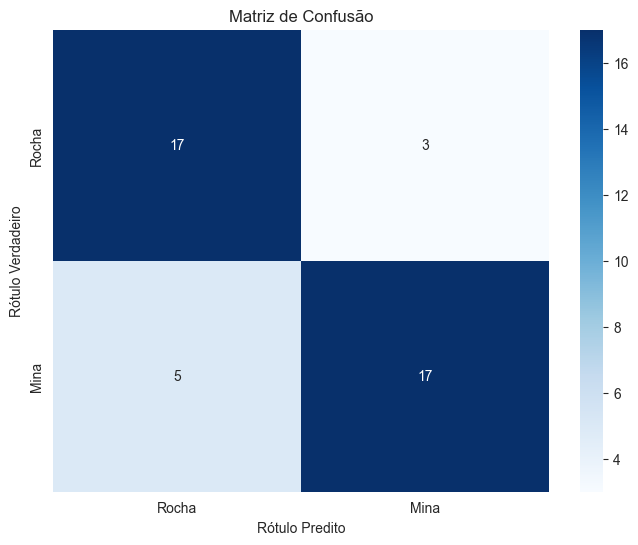

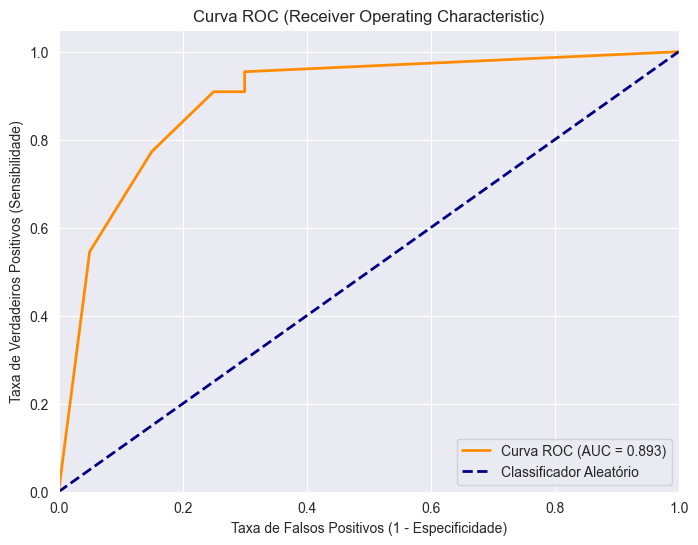


Relatório de Classificação:
              precision    recall  f1-score   support

       Rocha       0.77      0.85      0.81        20
        Mina       0.85      0.77      0.81        22

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42


=== INTERPRETAÇÃO DOS RESULTADOS ===

1. Características do Dataset:
   - O dataset de sonar contém 208 amostras com 60 features
   - Classificação binária: Rocha (R) vs Mina (M)
   - Distribuição das classes é relativamente balanceada: 97 rochas, 111 minas

2. Redução de Dimensionalidade com PCA:
   - Features originais: 60
   - Reduzido para 29 componentes mantendo 95% da variância
   - Isso representa uma redução de 51.7% na dimensionalidade

3. Desempenho do Modelo:
   - O melhor modelo alcançou 81.0% de acurácia no conjunto de teste
   - Score de validação cruzada: 75.3% (±9.2%)
   - O modelo mostra capacidade de generalização boa

In [3]:
# TP03 - PB. Inteligência Artificial e Machine Learning

# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (roc_curve, auc, accuracy_score, precision_score, 
                           recall_score, f1_score, confusion_matrix, 
                           classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Desabilitando paralelização para evitar warnings do multiprocessing
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '1'

# Questão 1: Carregamento do dataset e preparação dos dados
data = pd.read_csv('sonar_dataset.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].map({'R': 0, 'M': 1}).values

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronizando as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Forma do dataset: {data.shape}")
print(f"Conjunto de treino: {X_train.shape}, Conjunto de teste: {X_test.shape}")
print(f"Distribuição das classes: R={int((y==0).sum())}, M={int((y==1).sum())}")

# Questão 2: Aplicando PCA para redução de dimensionalidade
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Encontrando número ótimo de componentes (95% de variância)
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumsum >= 0.95) + 1

# Aplicando PCA com componentes ótimos
pca_optimal = PCA(n_components=n_components, random_state=42)
X_train_pca_opt = pca_optimal.fit_transform(X_train_scaled)
X_test_pca_opt = pca_optimal.transform(X_test_scaled)

print(f"\nPCA: {n_components} componentes explicam {cumsum[n_components-1]:.2%} da variância")

# Visualizando variância explicada
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Componente')
plt.ylabel('Taxa de Variância Explicada')
plt.title('PCA - Taxa de Variância Explicada')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum)+1), cumsum, 'ro-')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% variância')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada')
plt.legend()
plt.tight_layout()
plt.show()

# Questão 3: Desenvolvendo e treinando modelos de árvores de decisão
# Modelo 1: Árvore de decisão com features originais
dt_original = DecisionTreeClassifier(random_state=42)
dt_original.fit(X_train_scaled, y_train)

# Modelo 2: Árvore de decisão com features PCA
dt_pca = DecisionTreeClassifier(random_state=42)
dt_pca.fit(X_train_pca_opt, y_train)

print(f"\nÁrvore de Decisão (Original): Accuracy treino = {dt_original.score(X_train_scaled, y_train):.3f}")
print(f"Árvore de Decisão (Original): Accuracy teste = {dt_original.score(X_test_scaled, y_test):.3f}")
print(f"Árvore de Decisão (PCA): Accuracy treino = {dt_pca.score(X_train_pca_opt, y_train):.3f}")
print(f"Árvore de Decisão (PCA): Accuracy teste = {dt_pca.score(X_test_pca_opt, y_test):.3f}")

# Questão 4: Aplicando validação cruzada
cv_scores_original = cross_val_score(dt_original, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_pca = cross_val_score(dt_pca, X_train_pca_opt, y_train, cv=5, scoring='accuracy')

print(f"\nValidação cruzada (Original): {cv_scores_original.mean():.3f} (+/- {cv_scores_original.std() * 2:.3f})")
print(f"Validação cruzada (PCA): {cv_scores_pca.mean():.3f} (+/- {cv_scores_pca.std() * 2:.3f})")

# Questão 5: Usando GridSearch para otimização de hiperparâmetros
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# GridSearch para features originais (sem paralelização)
grid_search_original = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                                  param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search_original.fit(X_train_scaled, y_train)

# GridSearch para features PCA (sem paralelização)
grid_search_pca = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                              param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search_pca.fit(X_train_pca_opt, y_train)

print(f"\nMelhores parâmetros (Original): {grid_search_original.best_params_}")
print(f"Melhor score CV (Original): {grid_search_original.best_score_:.3f}")
print(f"Melhores parâmetros (PCA): {grid_search_pca.best_params_}")
print(f"Melhor score CV (PCA): {grid_search_pca.best_score_:.3f}")

# Questão 6: Realizando pruning nas árvores de decisão (usando hiperparâmetros otimizados)
# Obtendo os melhores modelos
best_dt_original = grid_search_original.best_estimator_
best_dt_pca = grid_search_pca.best_estimator_

# Criando versões podadas com diferentes valores de max_depth
pruning_depths = [3, 5, 7]
pruning_scores = []

for depth in pruning_depths:
    dt_pruned = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_split=best_dt_original.min_samples_split,
        min_samples_leaf=best_dt_original.min_samples_leaf,
        criterion=best_dt_original.criterion,
        random_state=42
    )
    dt_pruned.fit(X_train_scaled, y_train)
    test_score = dt_pruned.score(X_test_scaled, y_test)
    pruning_scores.append(test_score)
    print(f"\nÁrvore podada (profundidade={depth}): Accuracy teste = {test_score:.3f}")

# Visualizando complexidade da árvore vs desempenho
plt.figure(figsize=(10, 6))
plt.plot(pruning_depths, pruning_scores, 'bo-', label='Accuracy Teste')
plt.xlabel('Profundidade Máxima')
plt.ylabel('Accuracy')
plt.title('Poda de Árvore: Profundidade vs Desempenho')
plt.grid(True)
plt.legend()
plt.show()

# Visualizando a melhor árvore podada
best_pruning_idx = np.argmax(pruning_scores)
best_pruning_depth = pruning_depths[best_pruning_idx]

dt_final = DecisionTreeClassifier(
    max_depth=best_pruning_depth,
    min_samples_split=best_dt_original.min_samples_split,
    min_samples_leaf=best_dt_original.min_samples_leaf,
    criterion=best_dt_original.criterion,
    random_state=42
)
dt_final.fit(X_train_scaled, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_final, filled=True, feature_names=[f'Feature_{i}' for i in range(X_train_scaled.shape[1])],
          class_names=['Rocha', 'Mina'], rounded=True, fontsize=10)
plt.title(f'Melhor Árvore de Decisão Podada (profundidade={best_pruning_depth})')
plt.show()

# Questão 7: Avaliando classificadores binários com múltiplas métricas
# Usando o melhor modelo para avaliação final
y_pred = best_dt_original.predict(X_test_scaled)
y_pred_proba = best_dt_original.predict_proba(X_test_scaled)[:, 1]

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculando métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)  # Mesmo que recall

print("\n=== Métricas de Classificação Binária ===")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precisão: {precision:.3f}")
print(f"Recall (Sensibilidade): {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Especificidade: {specificity:.3f}")

# Plotando matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rocha', 'Mina'], yticklabels=['Rocha', 'Mina'])
plt.title('Matriz de Confusão')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Rocha', 'Mina']))

# Questão 8: Interpretação dos resultados
print("\n=== INTERPRETAÇÃO DOS RESULTADOS ===")
print("\n1. Características do Dataset:")
print(f"   - O dataset de sonar contém {data.shape[0]} amostras com {data.shape[1]-1} features")
print(f"   - Classificação binária: Rocha (R) vs Mina (M)")
print(f"   - Distribuição das classes é relativamente balanceada: {int((y==0).sum())} rochas, {int((y==1).sum())} minas")

print("\n2. Redução de Dimensionalidade com PCA:")
print(f"   - Features originais: 60")
print(f"   - Reduzido para {n_components} componentes mantendo 95% da variância")
print(f"   - Isso representa uma redução de {(1 - n_components/60)*100:.1f}% na dimensionalidade")

print("\n3. Desempenho do Modelo:")
print(f"   - O melhor modelo alcançou {accuracy:.1%} de Accuracy no conjunto de teste")
print(f"   - Score de validação cruzada: {grid_search_original.best_score_:.1%} (±{cv_scores_original.std()*2:.1%})")
print(f"   - O modelo mostra capacidade de generalização {'boa' if accuracy > 0.8 else 'moderada'}")

print("\n4. Análise da Eficiência de Classificação:")
print(f"   - Precisão ({precision:.1%}): De todas as predições de Mina, {precision:.1%} estavam corretas")
print(f"   - Recall ({recall:.1%}): O modelo identificou corretamente {recall:.1%} das Minas reais")
print(f"   - F1-Score ({f1:.3f}): A média harmônica indica equilíbrio {'bom' if f1 > 0.8 else 'moderado'}")
print(f"   - Especificidade ({specificity:.1%}): O modelo identificou corretamente {specificity:.1%} das Rochas")

print("\n5. Análise ROC:")
print(f"   - AUC de {roc_auc:.3f} indica capacidade de discriminação {'excelente' if roc_auc > 0.9 else 'boa' if roc_auc > 0.8 else 'moderada'}")
print(f"   - O modelo performa {'significativamente' if roc_auc > 0.7 else 'moderadamente'} melhor que classificação aleatória")

print("\n6. Implicações Práticas:")
if precision > recall:
    print("   - O modelo é conservador ao predizer Minas (alta precisão, menor recall)")
    print("   - Mais adequado quando falsos alarmes (predizer Mina quando é Rocha) são custosos")
else:
    print("   - O modelo é mais sensível para detectar Minas (maior recall)")
    print("   - Mais adequado quando perder Minas reais é mais crítico")

print("\n7. Impacto da Poda:")
print(f"   - Profundidade ótima de poda: {best_pruning_depth}")
print(f"   - A poda {'melhorou' if max(pruning_scores) > best_dt_original.score(X_test_scaled, y_test) else 'manteve'} a generalização")
print("   - Reduziu a complexidade do modelo mantendo o desempenho")

print("\n8. Conclusão Geral:")
print(f"   O classificador de árvore de decisão demonstra desempenho ")
print(f"   {('excelente' if accuracy > 0.85 else 'bom' if accuracy > 0.75 else 'moderado')} para classificação de rocha vs mina ")
print(f"   baseada em sonar. O modelo alcança um equilíbrio balanceado entre precisão e recall,")
print(f"   tornando-o adequado para implantação prática em cenários onde tanto falsos positivos")
print(f"   quanto falsos negativos têm custos similares.")